#### PREPARING PROJECT

In [1]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from sys import path
from os import getcwd

In [2]:
path.append("../../../src/")
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
from parsing import *
from preprocessing import *

#### PREPARING DATAFRAME

In [4]:
df = create_subj_df("../../" + raw_data_path + preproc_subj_paths[getcwd().split("\\")[-1]])

In [5]:
df.head(3)

,date,peak_hour,code_dpg
0,2012-04-02,11,"PINTORE2,PINTORE3,PINTORE4,PINTORE1"
1,2012-04-03,10,"PINTORE2,PINTORE3,PINTORE4,PINTORE1"
2,2012-04-04,11,"PINTORE2,PINTORE3,PINTORE4,PINTORE1"


In [6]:
df.tail(3)

,date,peak_hour,code_dpg
4249,2024-08-28,14,PORELENE
4250,2024-08-29,15,PORELENE
4251,2024-08-30,14,PORELENE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4252 entries, 0 to 4251
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4252 non-null   datetime64[ns]
 1   peak_hour  4252 non-null   object        
 2   code_dpg   4252 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 99.8+ KB


#### DATA PROCESSING

* CONVERTING TYPE

In [8]:
df["peak_hour"] = df["peak_hour"].astype("int")
df["code_dpg"] = df["code_dpg"].astype("category")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4252 entries, 0 to 4251
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4252 non-null   datetime64[ns]
 1   peak_hour  4252 non-null   int64         
 2   code_dpg   4252 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 71.4 KB


In [10]:
df["code_dpg"] = df["code_dpg"].apply(str.upper)

In [11]:
df

,date,peak_hour,code_dpg
0,2012-04-02,11,"PINTORE2,PINTORE3,PINTORE4,PINTORE1"
1,2012-04-03,10,"PINTORE2,PINTORE3,PINTORE4,PINTORE1"
2,2012-04-04,11,"PINTORE2,PINTORE3,PINTORE4,PINTORE1"
3,2012-04-05,11,"PINTORE2,PINTORE3,PINTORE4,PINTORE1"
4,2012-04-06,11,"PINTORE2,PINTORE3,PINTORE4,PINTORE1"
...,...,...,...
4247,2024-08-26,16,PORELENE
4248,2024-08-27,15,PORELENE
4249,2024-08-28,14,PORELENE
4250,2024-08-29,15,PORELENE


* WORKING WITH MISSING VALUES

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4252 entries, 0 to 4251
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4252 non-null   datetime64[ns]
 1   peak_hour  4252 non-null   int64         
 2   code_dpg   4252 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 71.4 KB


In [14]:
df.nunique()

date         3055
peak_hour      13
code_dpg       24
dtype: int64

In [15]:
uniq_codes_dpg = df["code_dpg"].unique()

* WORKING WITH EMISSIONS

________________________________________________________________________________________________________________________________________________________

In [16]:
def dpg_boxplot(x_size, y_size, dgp_code, feature_name, df):
    """"""

    plt.figure(figsize=(x_size, y_size))
    plt.title(uniq_codes_dpg[dgp_code])
    sns.boxplot(data=df[df[feature_name] == uniq_codes_dpg[dgp_code]], y="peak_hour");

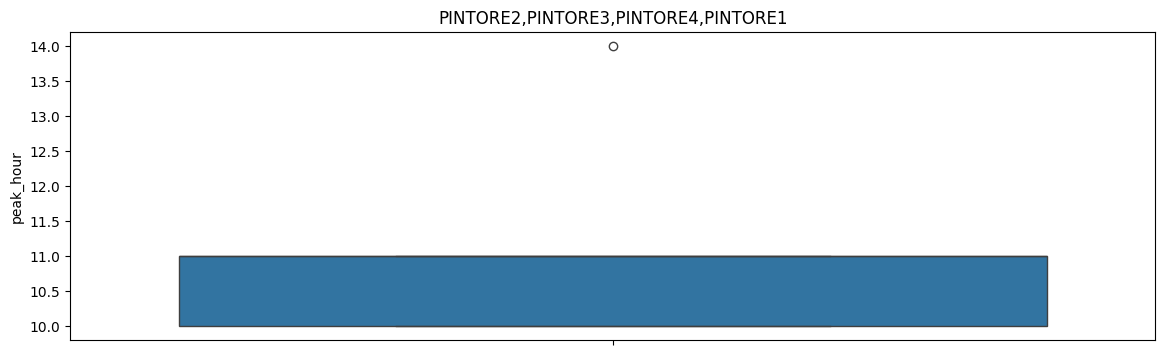

In [17]:
dpg_boxplot(14, 4, 0, "code_dpg", df)

________________________________________________________________________________________________________________________________________________________

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4252 entries, 0 to 4251
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4252 non-null   datetime64[ns]
 1   peak_hour  4252 non-null   int64         
 2   code_dpg   4252 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 71.4 KB


* AGGREGATING DATA

In [19]:
grouped_df = df.drop(["code_dpg"], axis=1).groupby(pd.Grouper(key="date", axis=0, freq="1D", sort=True)).mean()

In [20]:
grouped_df

,peak_hour
date,
2012-04-02,11.0
2012-04-03,10.0
2012-04-04,11.0
2012-04-05,11.0
2012-04-06,11.0
...,...
2024-08-26,16.0
2024-08-27,15.0
2024-08-28,14.0


* HANDLE MISSING DATA OF AGG DATA

In [21]:
grouped_df.dropna(inplace=True)

In [22]:
grouped_df

,peak_hour
date,
2012-04-02,11.0
2012-04-03,10.0
2012-04-04,11.0
2012-04-05,11.0
2012-04-06,11.0
...,...
2024-08-26,16.0
2024-08-27,15.0
2024-08-28,14.0


In [23]:
grouped_df.sort_index(inplace=True)

In [24]:
grouped_df

,peak_hour
date,
2012-04-02,11.0
2012-04-03,10.0
2012-04-04,11.0
2012-04-05,11.0
2012-04-06,11.0
...,...
2024-08-26,16.0
2024-08-27,15.0
2024-08-28,14.0


In [25]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3055 entries, 2012-04-02 to 2024-08-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   peak_hour  3055 non-null   float64
dtypes: float64(1)
memory usage: 47.7 KB


* HANDLE DATA TYPE OF AGG DATA

In [26]:
grouped_df["peak_hour"] = grouped_df["peak_hour"].astype("int")

In [27]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3055 entries, 2012-04-02 to 2024-08-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   peak_hour  3055 non-null   int64
dtypes: int64(1)
memory usage: 47.7 KB


In [28]:
grouped_df.nunique()

peak_hour    13
dtype: int64

In [29]:
grouped_df.describe()

,peak_hour
count,3055.000000
mean,12.113584
std,2.851003
min,9.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,21.000000


In [30]:
grouped_df

,peak_hour
date,
2012-04-02,11
2012-04-03,10
2012-04-04,11
2012-04-05,11
2012-04-06,11
...,...
2024-08-26,16
2024-08-27,15
2024-08-28,14


In [31]:
grouped_df.index.names = ["days"]

In [32]:
grouped_df

,peak_hour
days,
2012-04-02,11
2012-04-03,10
2012-04-04,11
2012-04-05,11
2012-04-06,11
...,...
2024-08-26,16
2024-08-27,15
2024-08-28,14


In [33]:
print("Time step is:", grouped_df.index[1] - grouped_df.index[0])

Time step is: 1 days 00:00:00


* SAVE DATA

In [35]:
grouped_df.to_parquet("../../../data/processed/Орловская область/data.gzip")